<a href="https://colab.research.google.com/github/lgkartik/mlmadeeasy/blob/master/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##regular expression -first step for NLP

In [0]:
#load all the required libraries
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [0]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline


In [0]:
from google.colab import files
uploaded =files.upload()

Saving train_E6oV3lV.csv to train_E6oV3lV.csv


In [0]:
uploaded = files.upload()

Saving test_tweets_anuFYb8.csv to test_tweets_anuFYb8.csv


In [0]:
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [0]:
#data inspection

In [0]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [0]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [0]:
train[train['label']==0].head(10)
#these are some of the non-racist/sexist data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [0]:
train[train['label']==1].head(10)
#these are some of the non-racist/sexist data

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [0]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [0]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [0]:
#in the dataset we can see that 29720 i.e 97% of the whole data is non raciest/sexiest and only 2242 i.e 7% is raciest and sexiest. Due to
#this it would become a Imbalance classification

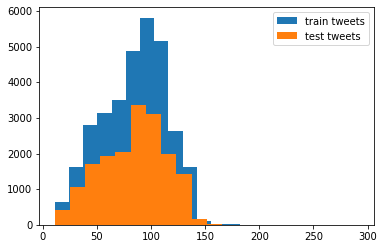

In [0]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train,bins =20,label="train tweets")
plt.hist(length_test,bins =20,label="test tweets")
plt.legend()
plt.show()

In [0]:
combi = train.append(test, ignore_index=True) 
combi.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(49159, 3)

In [0]:
#function to remove unwanted text pattern from the pattern 
def remove_pattern(input_text,pattern):
  r = re.findall(pattern,input_text)
  for i in r:
    input_text = re.sub(i,'',input_text)
  return input_text

In [0]:
combi['tidy_tweet'] ='a'

In [0]:
for i in range(len(combi)):
  combi['tidy_tweet'][i] = remove_pattern(combi['tweet'][i],"@[\w]*")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [0]:
#we removed the @user 


In [0]:
#Removing Punctuations, Numbers, and Special Characters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [0]:
###removing all short word . word with less than 3 characters 
combi['tidy_tweet'] =combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [0]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [0]:
#text normalizations 
#stemming 
#first step is tokenizations 
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [0]:
#use porter stemmer for fitting the model 
from nltk.stem.porter import *

In [0]:
stemmer = PorterStemmer()

In [0]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [0]:
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [0]:
#add back this to our actual dataset i.e combi
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [0]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [0]:
#Story generations and visualizations form

In [0]:
all_words = ' '.join([text for text in combi['tidy_tweet']])

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes

In [0]:
len(all_words)

2571845

In [0]:
from wordcloud import WordCloud

In [0]:
wordcloud = WordCloud(width=800,height=400,random_state=21,max_font_size=110).generate(all_words)

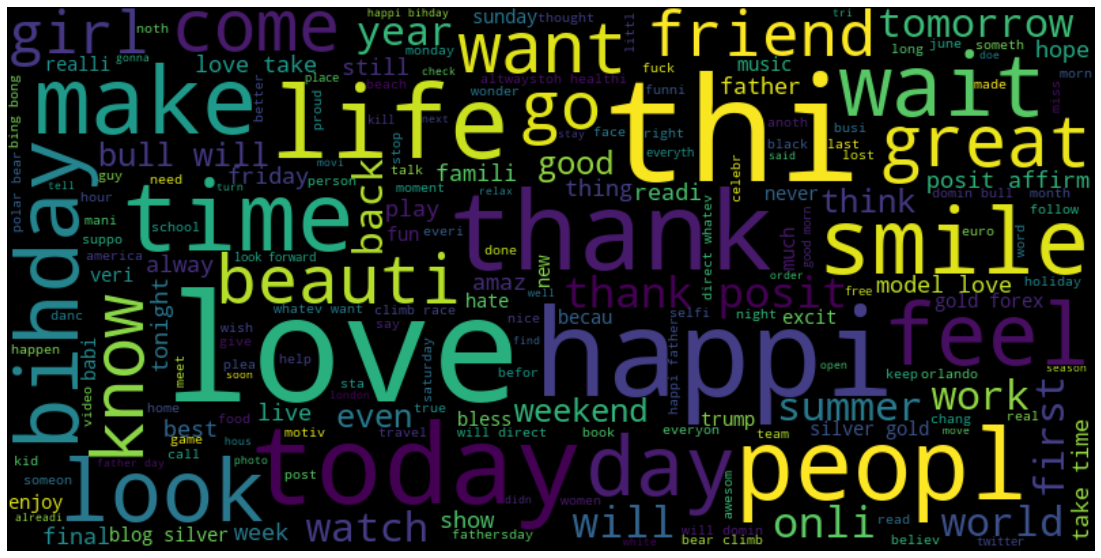

In [0]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
#we can see the most of the words are normal words .it does not give any intuition about the racist and sexist. 
#so lets visualize for separately for them

In [0]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])

In [0]:
normal_cloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)

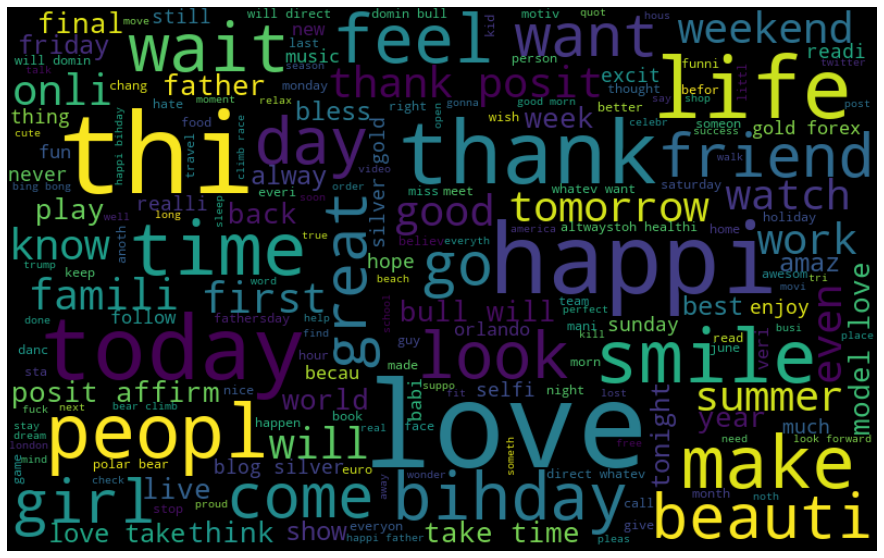

In [0]:
plt.figure(figsize=(20,10))
plt.imshow(normal_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

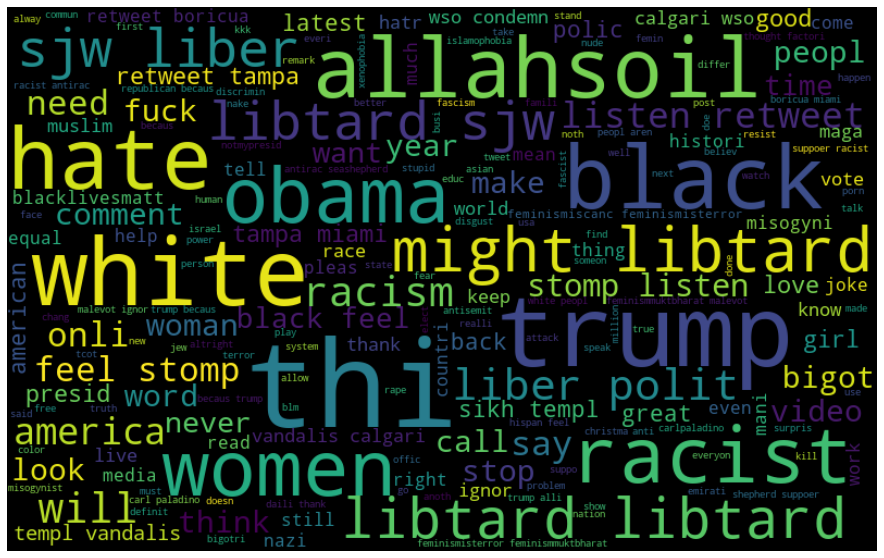

In [0]:
non_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
non_cloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(non_words)
plt.figure(figsize=(20,10))
plt.imshow(non_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
#from the above two plots we an clearly see that the words related to raciest and sexiest are different from that of normals

In [0]:
#Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

In [0]:
##function to extract all hash_tags 
def find_hash_tag(x):
  hash_tags =[]
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hash_tags.append(ht)
  return hash_tags

In [0]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = find_hash_tag(combi['tidy_tweet'][combi['label'] == 0]) 


In [0]:
# extracting hashtags from  racist/sexist tweets 
HT_negative = find_hash_tag(combi['tidy_tweet'][combi['label'] == 1]) 


In [0]:
#visualizing the top 10 hashtags of HT_negative and ht_normal

In [0]:
#Non-Racist/Sexist Tweets 
HT_regular_single =[]
for i in HT_regular:
  if(len(i)!=0):
    for j in i:
      HT_regular_single.append(j)

In [0]:
a =nltk.FreqDist(HT_regular_single)


In [0]:
d = pd.DataFrame({'Hashtag':list(a.keys()),'Count': list(a.values())})

In [0]:
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [0]:
#select top 20 frequency tags 
d = d.nlargest(columns="Count",n=20)

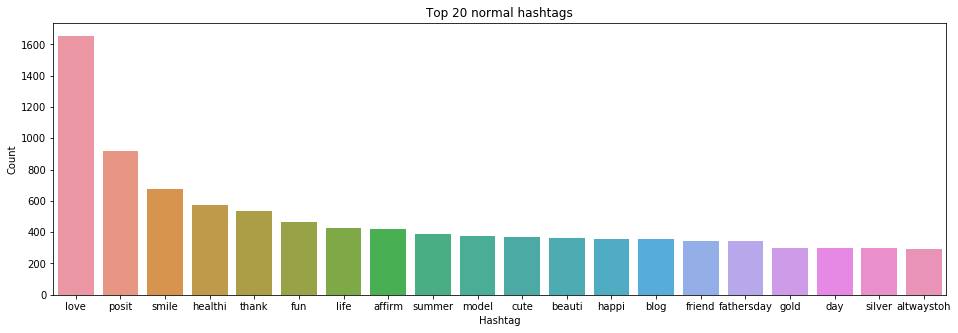

In [0]:
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.title("Top 20 normal hashtags")
plt.show()

In [0]:
#lets do for the raciest/sexiest too
#Non-Racist/Sexist Tweets 
HT_neg_single =[]
for i in HT_negative:
  if(len(i)!=0):
    for j in i:
      HT_neg_single.append(j)

In [0]:
a =nltk.FreqDist(HT_neg_single)
d = pd.DataFrame({'Hashtag':list(a.keys()),'Count': list(a.values())})
d.head()


,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


In [0]:
d = d.nlargest(n=20,columns="Count")

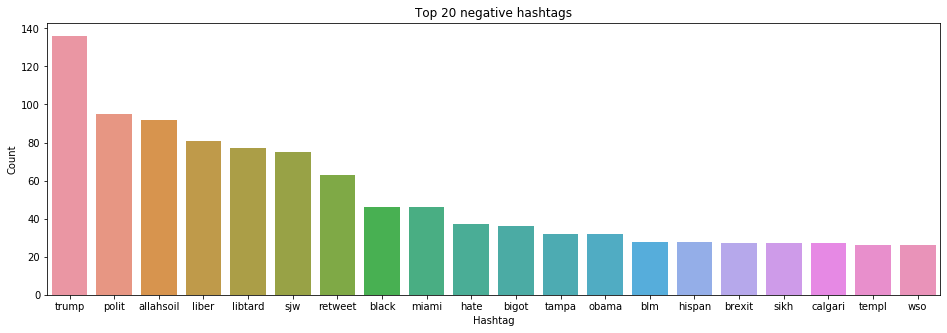

In [0]:
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.title("Top 20 negative hashtags")
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [0]:
bow_vectorizer = CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')

In [0]:
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
##bow is the bag of word features

In [0]:
bow.shape

(49159, 1000)

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
#this is tfidf features 

In [0]:
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])


In [0]:
tfidf.shape

(49159, 1000)

In [0]:
#word to vector features 

In [0]:
#training a word to vector model 
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [0]:
model_w2v = gensim.models.Word2Vec(tokenized_tweet,size =200,window=5,min_count =2,sg=1,hs = 0,
            negative = 10,workers =2,seed =34)

In [0]:
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)


(6511244, 7536020)

In [0]:
model_w2v.wv.most_similar(positive="dinner")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('#bihdaydinn', 0.5144402384757996),
 ('#biall', 0.5109190344810486),
 ('#foodcoma', 0.4836529493331909),
 ('lukey', 0.47682279348373413),
 ('#cellar', 0.4736328721046448),
 ('#avocado', 0.46645164489746094),
 ('alfredo', 0.46349871158599854),
 ('spaghetti', 0.4625590443611145),
 ('mansion', 0.46039342880249023),
 ('#tacotuesday', 0.456431120634079)]

In [0]:
model_w2v.wv.most_similar(positive="trump")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('donald', 0.5546792149543762),
 ('phoni', 0.5322169065475464),
 ('tomlin', 0.5242149233818054),
 ('businessman', 0.5148510336875916),
 ('nomine', 0.5036135911941528),
 ('hillari', 0.5009819865226746),
 ('irrefut', 0.5003393292427063),
 ('potu', 0.5000180006027222),
 ('truism', 0.4998277425765991),
 ('embolden', 0.4939924478530884)]

In [0]:
model_w2v['food']

array([-4.9213770e-01,  8.8971782e-01, -6.4855680e-02, -1.8574753e-01,
       -7.3661166e-03,  1.3289558e+00, -3.4958759e-01, -7.0568621e-01,
        3.6321780e-01,  1.9798441e-01, -5.9967333e-01, -6.4835691e-01,
        7.6126581e-01,  4.3372005e-01, -2.1291421e-01, -3.1884715e-01,
        2.9863995e-01,  1.2707528e+00,  8.5056317e-01, -4.3725815e-02,
        1.7300108e-01,  1.8665195e-01,  4.7077888e-01,  7.8516358e-01,
       -5.4301471e-01,  4.1091597e-01,  1.5273619e-01, -4.3560025e-01,
       -7.0296466e-01,  4.6856627e-01, -3.1745058e-01, -1.6734870e-01,
        3.0181152e-01,  1.0304964e+00,  2.3382629e-01,  5.3608394e-01,
       -7.7270675e-01,  6.9727771e-02,  1.7608897e-01,  1.4890766e-01,
        3.2386824e-01,  3.8163155e-01, -3.6279663e-01, -2.3890832e-01,
        4.7475165e-01, -2.3902963e-01, -3.9035633e-01, -3.3872813e-01,
        6.4335656e-01,  1.6562972e-02,  3.2111219e-01, -1.1524785e+00,
       -4.3556285e-01,  4.9802551e-01,  3.1622198e-01, -9.8185435e-02,
      

In [0]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:                                     
          continue
    if count != 0:
        vec /= count
    return vec

In [0]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

In [0]:
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)

In [0]:
wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape

(49159, 200)

In [0]:
##model fitting 
#1.logistic regression


In [0]:
#model using bag of words
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [0]:
from sklearn.model_selection import train_test_split
X_train_bow,X_valid_bow,y_train_bow,y_valid_bow =train_test_split(train_bow,train['label'])

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lreg = LogisticRegression()

In [0]:
lreg.fit(X_train_bow,y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lreg.predict(X_valid_bow)

In [0]:
from sklearn.metrics import f1_score
f1_score(y_valid_bow,y_pred)

0.5419664268585132

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid_bow,y_pred)

0.9521962207483419

In [0]:
test_pred = lreg.predict(test_bow)

In [0]:
test_pred = test_pred.astype(np.int)

In [0]:
test['label'] = test_pred

In [0]:
submission = test[['id','label']]

In [0]:
submission.to_csv('sub_lreg_bow.csv', index=False)

In [0]:
files.download('sub_lreg_bow.csv')

In [0]:
#TF-IDF Features

In [0]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:]

In [0]:
Xtrain_tfidf,Xtest_tfidf,Ytrain_tfidf,Ytest_tfidf =train_test_split(train_tfidf,train['label'])

In [0]:
lreg.fit(Xtrain_tfidf,Ytrain_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_tdif =lreg.predict(Xtest_tfidf)

In [0]:
accuracy_score = accuracy_score(Ytest_tfidf,y_pred_tdif)

In [0]:
accuracy_score

0.9501939682142411

In [0]:
f1_score(Ytest_tfidf,y_pred_tdif)

0.5062034739454094

In [0]:
#word to vector model 
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:]

In [0]:
xtrain_w2v = train_w2v.iloc[y_train_bow.index,:]
xvalid_w2v = train_w2v.iloc[y_valid_bow.index,:]

In [0]:
lreg.fit(xtrain_w2v, y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predict_w2v = lreg.predict(xvalid_w2v)

In [0]:
f1_score(y_valid_bow,y_predict_w2v)

0.5964912280701754

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_valid_bow,y_predict_w2v)

0.9539481917156801

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, y_train_bow) 

In [0]:
prediction = xgb.predict(xvalid_w2v)

In [0]:
f1_score(y_valid_bow,prediction)

0.7198275862068966

In [0]:
test_pred_w2v = xgb.predict(test_w2v)
test_pred_w2v = test_pred_w2v.astype(np.int)
test['label'] = test_pred_w2v
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False)
files.download('sub_lreg_bow.csv')